In [32]:
import pandas as pd
df = pd.read_csv('stock.csv')
df

,Open,High,Low,Close,Adj_Close,Volume
0,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,52.140873,53.651051,51.604362,52.657513,52.657513,9257400
...,...,...,...,...,...,...
3680,1207.479980,1216.300049,1200.500000,1205.920044,1205.920044,1017800
3681,1205.939941,1215.670044,1204.130005,1215.000000,1215.000000,950000
3682,1214.989990,1216.219971,1205.030029,1207.150024,1207.150024,907200
3683,1207.890015,1208.689941,1199.859985,1203.839966,1203.839966,860200


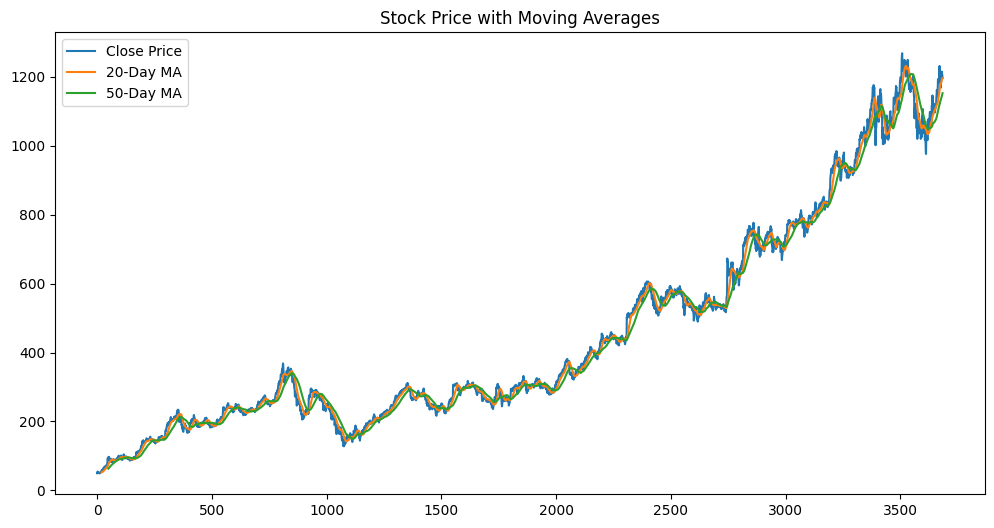

In [34]:
import matplotlib.pyplot as plt

df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day MA')
plt.plot(df['MA50'], label='50-Day MA')
plt.legend()
plt.title('Stock Price with Moving Averages')
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df['Target'] = df['Close'].shift(-1)
X = df[['Close']][:-1]
y = df['Target'][:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

y_pred = model.predict(X_test)
print(y_pred)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))






[ 307.77376169  644.11425079  235.51778674  814.02973809  751.9604129
  762.8720876   984.83543417  574.40712085  238.25042038  802.53301547
  799.42756782  574.51651229  834.93290323  242.00159407  907.61380803
  306.2931622   263.76830797  140.63057198  231.9106917    96.60526427
  251.33728695  274.35605099  540.09862029   58.78552108  308.0519715
  574.69805857  272.65187591  989.63614358  274.57464984  307.41106619
  263.53478287  148.0087107   272.75620058  252.61914157  255.85359062
  301.72219332  715.63494725  211.04822769  301.58307241  634.06269133
  730.74726419  612.29941195  502.75011291  239.51240502  149.38993026
  252.17197638 1093.79181012  155.09369837  338.60786315  791.15630589
  735.74801565  252.93214661  243.44243959  940.86880528  728.62695056
  308.27060135 1017.03027511  514.00857973 1154.31091336  140.64052248
  782.79506344  220.3441806   403.30685551  782.87509347  303.23755703
  348.39073523  635.6329353   293.62860009  301.89113271 1064.07738391
  184.07

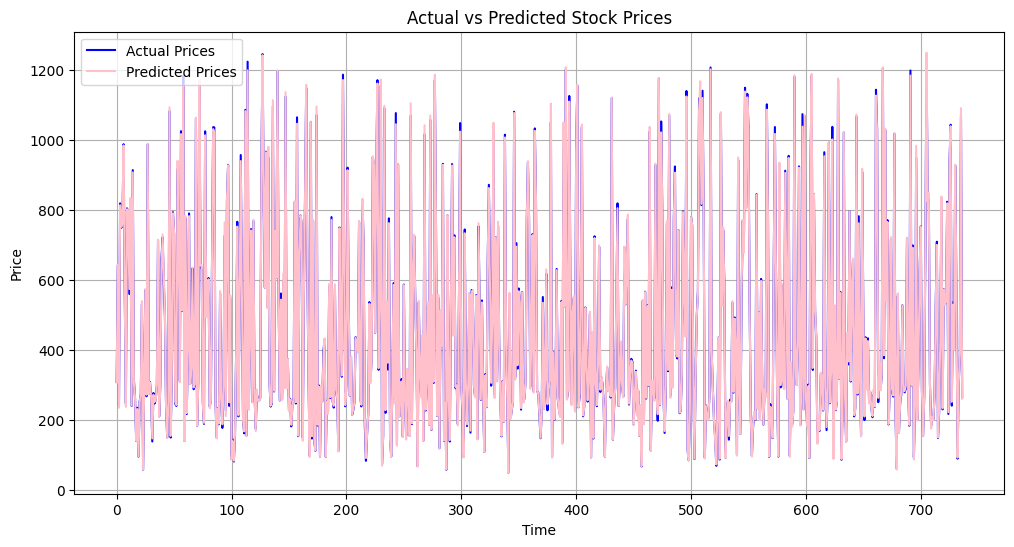

In [36]:
# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='pink')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

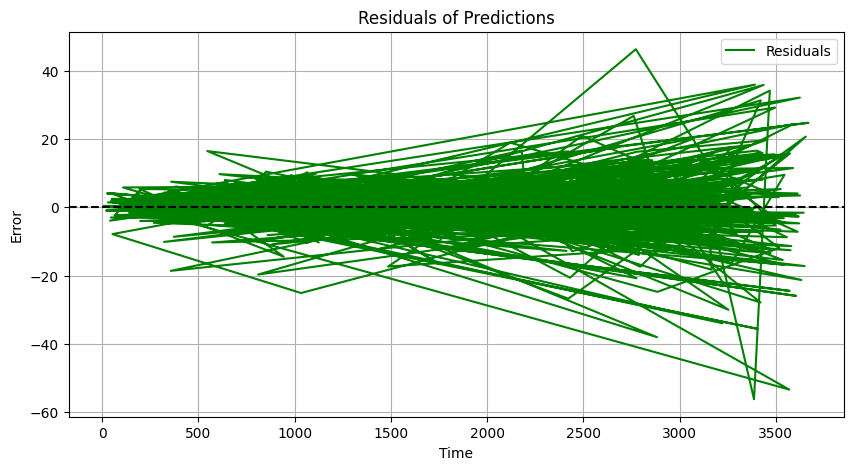

In [37]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
plt.plot(residuals, label='Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Confusion matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix and heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Down','Pred Up'],
            yticklabels=['True Down','True Up'])
plt.title('Confusion Matrix (Direction Classifier)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




ValueError: continuous is not supported

In [11]:
# More classification diagnostics: feature importances
feat_imp = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nFeature importances (classification):")
print(feat_imp)

plt.figure(figsize=(8,4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importances (Direction Classifier)')
plt.show()

NameError: name 'clf' is not defined

In [ ]:
# Price and moving averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-day MA')
plt.plot(df['MA50'], label='50-day MA')
plt.legend()
plt.title('Price with Moving Averages')
plt.show()

In [ ]:
# Rolling volatility plot
plt.figure(figsize=(12,6))
plt.plot(df['Volatility20'], label=f'{rolling_window}-day rolling vol (annualized)')
plt.title('Historical Volatility')
plt.legend()
plt.show()

In [ ]:
# Correlation matrix of features (heatmap)
corr = df_model[feature_cols + ['Target_Close_next']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Confusion matrix as normalized heatmap too
cm_norm = confusion_matrix(yc_test, yc_pred, normalize='true')
plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=['Pred Down','Pred Up'], yticklabels=['True Down','True Up'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()